In [26]:
import sympy as sp

from math import log, sin

x, y = sp.symbols('x y')

# Note: in the paper, we rounded the equation; we are giving the equation in full here
equation = 1.33*(sp.log(sp.log(x))**2)**(x + sp.log(y) + sp.sin(0.45*y))

In [27]:
# basic sanity check
equation

1.33*(log(log(x))**2)**(x + log(y) + sin(0.45*y))

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Step 1: Load the data from the CSV file
data = pd.read_csv('tsp_analysis_results.csv')

# Extract relevant columns: node_count (x), sample_size (y), and time (z)
X_and_y = data[['x (node_count)', 'y (sample_size)']].values  # Features (x, y)
z = data['z (time)'].values  # Target variable (z)

In [29]:
# test RSME:

predictions = np.array([equation.evalf(subs={x: row[0], y: row[1]}) for row in X_and_y], dtype=np.float64)
rmse = np.sqrt(np.mean((predictions - z)**2))

print(f"RMSE (Lower is better): {rmse}")

RMSE (Lower is better): 0.027925491011287246


### So the function is predicting the values quite well. Let's now see if that's also the case visually.

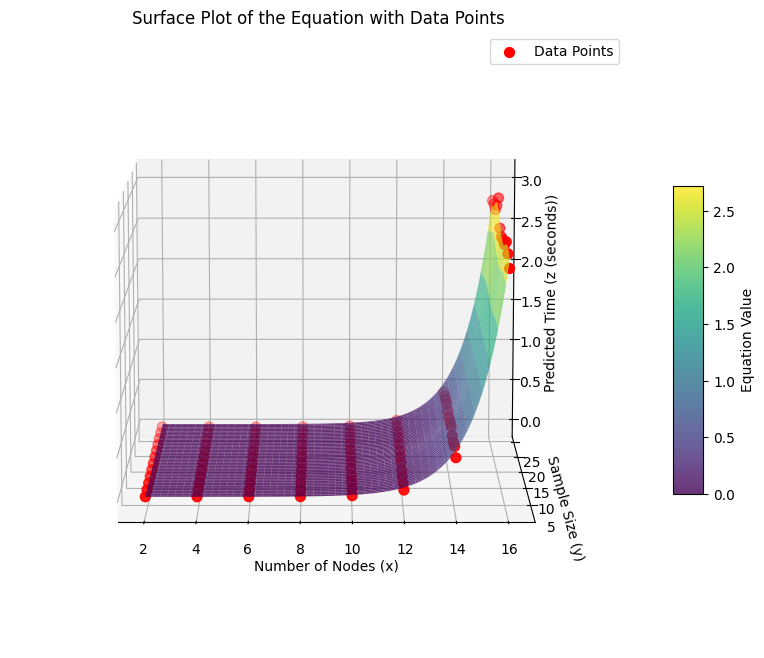

In [30]:
# Plot function and points (see how well it's fit)

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D

# Convert symbolic equation to a numerical function
numerical_eq = sp.lambdify((x, y), equation, modules='numpy')

# Separate X into x0 and x1
x_data = X_and_y[:, 0]
y_data = X_and_y[:, 1]

# Define the range for x0 and x1 for the surface plot
# Note: x must be greater than or equal to 2
x_vals = np.linspace(2, 16, 100)  # x >= 2
y_vals = np.linspace(2, 25, 100)

# Create a meshgrid for the surface
X, Y = np.meshgrid(x_vals, y_vals)

# Evaluate the equation on the meshgrid
Z_pred = numerical_eq(X, Y)

# Plot the surface and scatter points
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot of the equation
surf = ax.plot_surface(X, Y, Z_pred, cmap='viridis', alpha=0.8)


# Scatter plot for the data points
ax.scatter(x_data, y_data, z, color='red', label='Data Points', s=50)

ax.view_init(elev=10, azim=-90)

# Add labels, legend, and color bar
ax.set_title("Surface Plot of the Equation with Data Points")
ax.set_xlabel("Number of Nodes (x)")
ax.set_ylabel("Sample Size (y)")
ax.set_zlabel("Predicted Time (z (seconds))")
fig.colorbar(surf, shrink=0.5, aspect=10, label="Equation Value")
ax.legend()

# Show the plot
plt.show()



### We see that the function fits points well, both with RMSE and visually. Now, let's try to replicate the error that Desmos graphing produces.

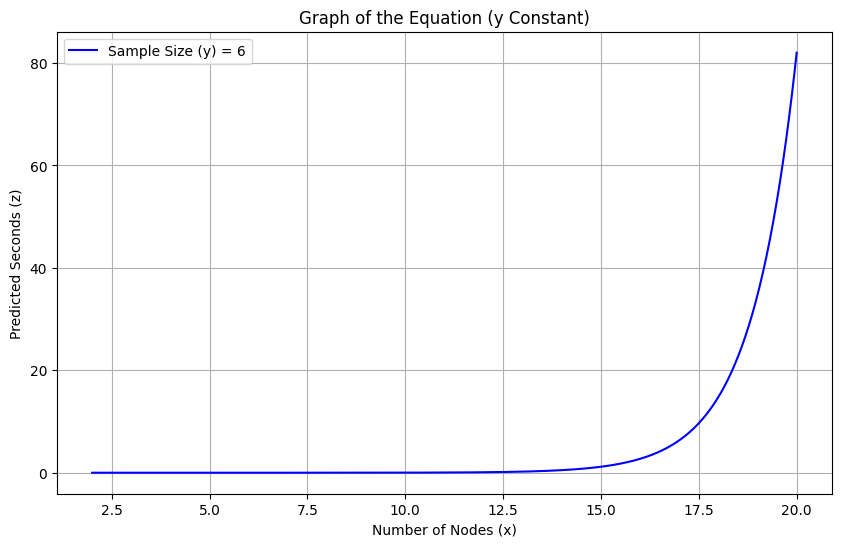

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

Y_CONSTANT = 6  # Example value; change as needed


# equation = 1.3265738 * (sp.log(sp.log(x0))**2)**(x0 + sp.log(x1) + sp.sin(0.4487219 * x1))
equation = 1.33 * (sp.log(sp.log(x))**2)**(x + sp.log(Y_CONSTANT) + sp.sin(0.45 * Y_CONSTANT))


# Convert symbolic equation to a numerical function
numerical_eq = sp.lambdify((x), equation, modules='numpy')

# Define a constant value for x1

# Define the range for x0
x0_min = 2  # Minimum bound (slightly greater than e to satisfy the domain)
x0_max = 20          # Maximum bound

# Generate x0 values within the specified range
x0_vals = np.linspace(x0_min, x0_max, 1000)

# Evaluate the equation for x0 with x1 constant
y_vals = numerical_eq(x0_vals)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(x0_vals, y_vals, label=f"Sample Size (y) = {Y_CONSTANT}", color='blue')

# Add labels, title, and legend
plt.title("Graph of the Equation (y Constant)")
plt.xlabel("Number of Nodes (x)")
plt.ylabel("Predicted Seconds (z)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
